In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
#data=nc.Dataset('/ihesp/archive/Sunway_Runs/LR_PI_CTRL/B.E.13.B1850C5.ne30g16.sehires38.003.sunway.cam.h.PSL.000101.050012.nc')

In [3]:
data=nc.Dataset('/scratch/user/xiliangdiao/LR-PSL/Sunway_LR_0001020100Z_0501010100Z.nc')

In [4]:
#data=nc.Dataset('/ihesp/archive/LR/b.e13.B1950C5.ne30_g16.ihesp24_1950cntl.002/atm/hist/b.e13.B1950C5.ne30_g16.ihesp24_1950cntl.002.cam.h0.0181-12.nc')

In [5]:
plotvar = data.variables['PSL']
lon = data.variables['lon']
lat = data.variables['lat']

In [6]:
lon[-32]

masked_array(data=320.,
             mask=False,
       fill_value=1e+20)

In [7]:
lon[24]

masked_array(data=30.,
             mask=False,
       fill_value=1e+20)

In [8]:
##65    #40W-30E
P651 = plotvar[:,26,:24]
P652 = plotvar[:,26,-32:]
re652 = np.hstack((P651,P652))
A = np.nanmean(re652,axis=1)



In [9]:
lala = A[8:6000:12]

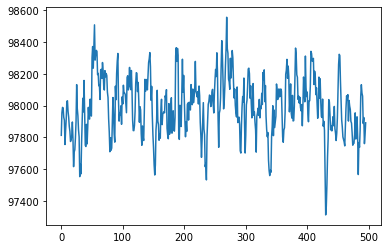

In [10]:
Atry = np.convolve(lala, np.ones((5,))/5, mode='valid')
plt.plot(Atry)

In [11]:
##40
P401 = plotvar[:,53,:24]
P402 = plotvar[:,53,-32:]
re402 = np.hstack((P401,P402))
B = np.nanmean(re402,axis=1)

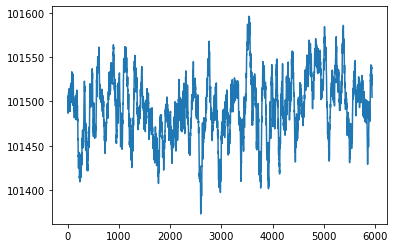

In [12]:
Btry = np.convolve(B, np.ones((60,))/60, mode='valid')
plt.plot(Btry)

In [13]:
P652.shape

(6000, 32)

In [14]:
std1 = np.std(A)
ave1 = np.nanmean(A)
final65 = (A - ave1)/std1

std = np.std(B)
ave = np.nanmean(B)
final40 = (B - ave)/std

In [15]:
ddd20062100 = final65-final40

In [16]:
ddd20062100.shape

(6000,)

In [17]:
ww2 = np.convolve(ddd20062100, np.ones((60,))/60, mode='valid')
mean = np.nanmean(ww2)

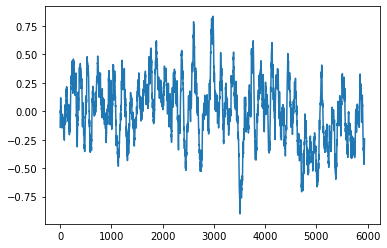

In [18]:
plt.plot(ww2)

In [19]:
d2 = ddd20062100[2941:5941]

In [20]:
d4 = d2.reshape(250,12)

In [21]:
dmean = np.nanmean(d4,axis=1)

In [22]:
ww2 = np.convolve(ddd20062100[2941:5941], np.ones((60,))/60, mode='valid')

Text(0.5, 1.0, 'PI-CTRL Averaged over the Weddell Sea Region (45$^\\circ$W - 40$^\\circ$E, 5 year running mean)')

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


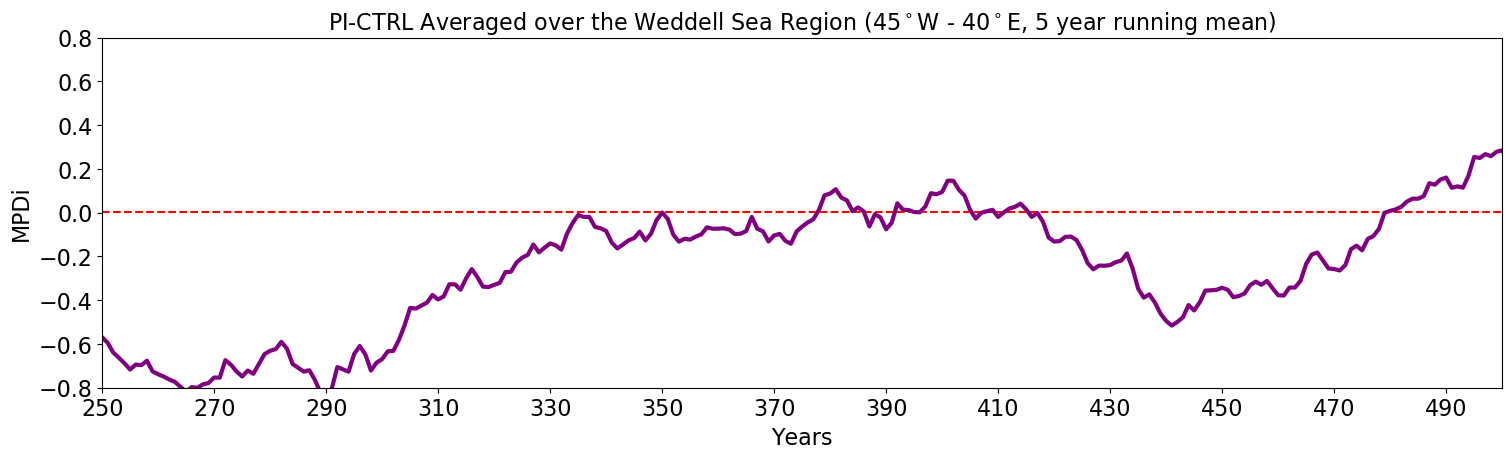

In [23]:
t = np.arange(2,2943,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
#ax0.vlines(xxx, 0, 0.65, colors = "yellow")
ax0.plot(-ww2,'purple',linewidth=3)
plt.hlines(mean, 0, 250, colors = "red",linestyles = "dashed")
#plt.vlines(1876, -1.25, 1, colors = "red",linestyles = "dashed")
#ax0.fill_between(t,mean,-ww2,where=-ww2 < 0,facecolor='grey', alpha=1)
#########################################
plt.xticks(range(0,250,20), ['250','270','290','310','330', '350', '370','390','410','430','450', '470', '490','510','430','450','470','490','500'],**my_font)

plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('MPDi',color= 'black',**my_font)
plt.axis("tight")
#plt.hlines(0, 0, 4200, colors = "g",linestyles = "dashed")
ax0.set(ylim=(-0.8, 0.8),xlim=(0, 250))
ax0.set_title('PI-CTRL Averaged over the Weddell Sea Region (45$^\circ$W - 40$^\circ$E, 5 year running mean)',**my_font)
#plt.savefig("pimdpi.png",bbox_inches='tight',dpi=fig.dpi)

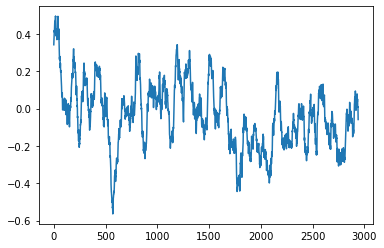

In [24]:
ww65 = np.convolve(final65[2941:5941], np.ones((60,))/60, mode='valid')
mean = np.nanmean(ww65)
plt.plot(ww65)

In [25]:
ww65.shape

(2941,)

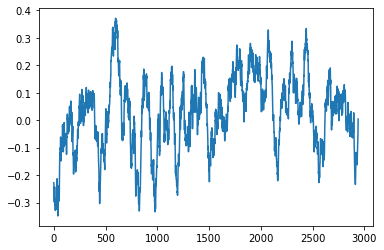

In [26]:
ww40 = np.convolve(final40[2941:5941], np.ones((60,))/60, mode='valid')
mean = np.nanmean(ww40)
plt.plot(ww40)

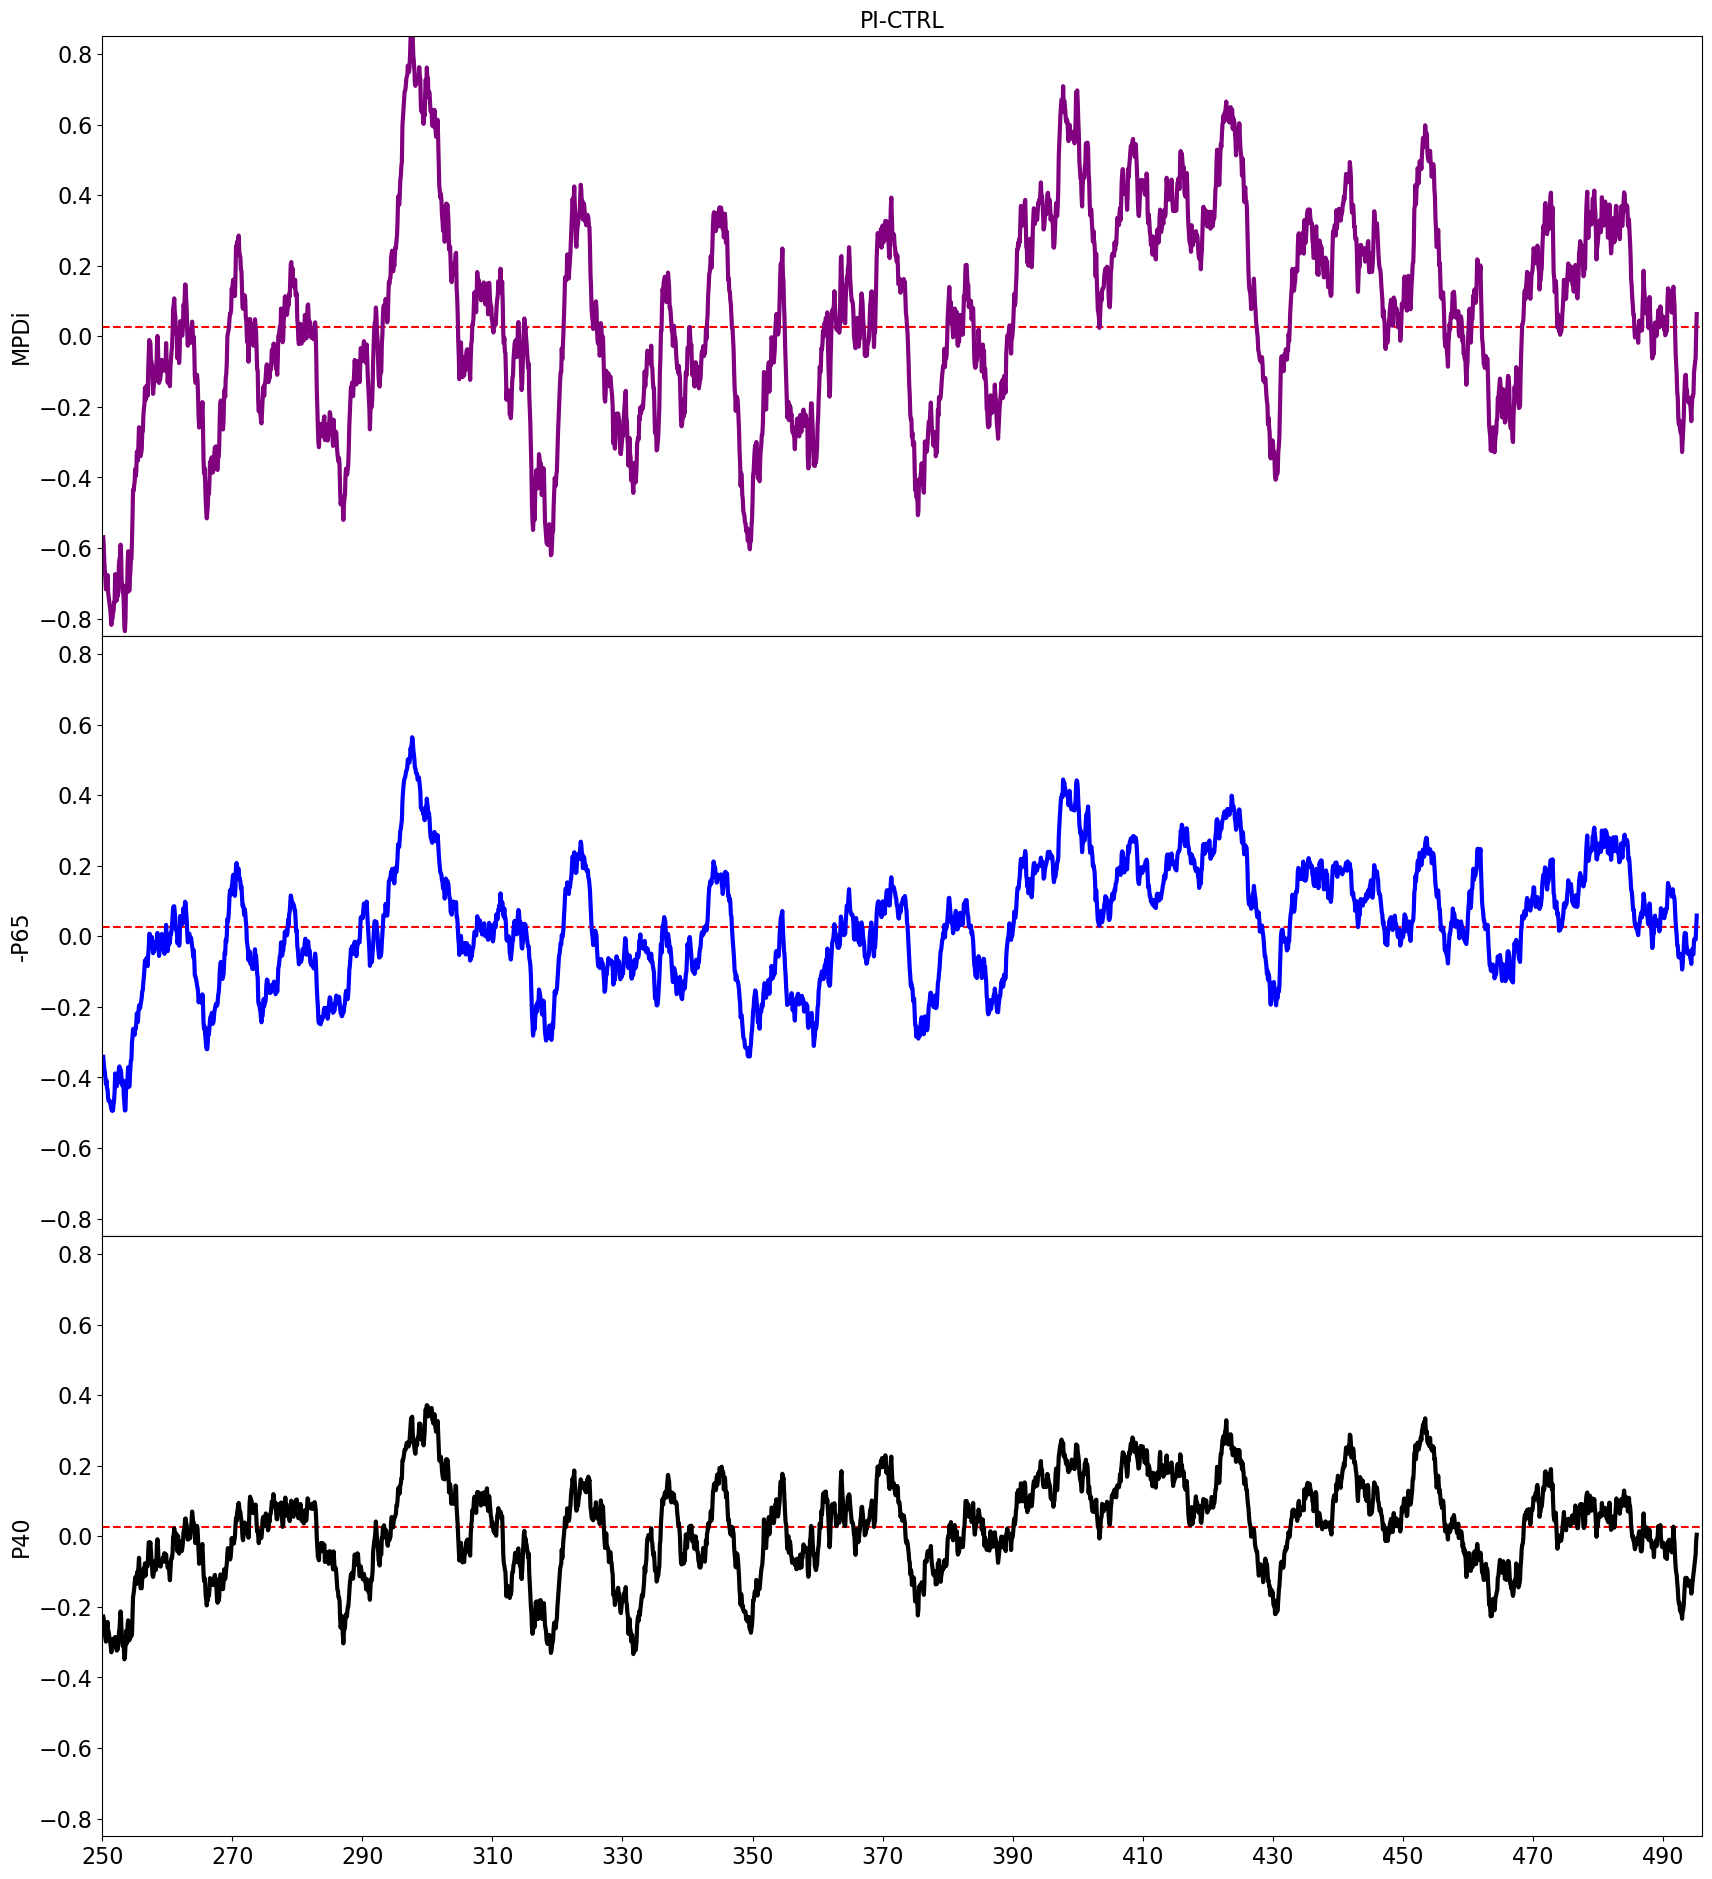

In [27]:
t = np.arange(2,2943,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,15), dpi=100)
################################################################
################################################################

ax1 = fig.add_axes([0.1, 0.9, 0.8, 0.4],
                   xticklabels=[])
#ax0 = plt.subplot(2,1,1)
ax1.plot(t,-ww2,'purple',linewidth=3)
plt.hlines(mean, 0, 2952, colors = "red",linestyles = "dashed")
#plt.vlines(1876, -1.25, 1, colors = "red",linestyles = "dashed")
#ax0.fill_between(t,mean,-ww2,where=-ww2 < 0,facecolor='red', alpha=1)
#########################################
#plt.xticks(range(0,2952,240), ['1850','1870','1890','1910','1930', '1950', '1970','1990','2010','2030','2050', '2070', '2090','410','430','450','470','490','500'],**my_font)

plt.yticks(**my_font)
#plt.xlabel('Years',**my_font)
#plt.xlabel('Years',**my_font)
plt.ylabel('MPDi',color= 'black',**my_font)
plt.axis("tight")
#plt.hlines(0, 0, 4200, colors = "g",linestyles = "dashed")
ax1.set(ylim=(-0.85, 0.85),xlim=(0, 2952))
plt.title('PI-CTRL',**my_font)
#ax1.set_title('HF-TNST simulation (averaged over the Weddell Sea Region 45$^\circ$W - 40$^\circ$E, 5 year running mean)',**my_font)
###########################################
ax2 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[])
ax2.plot(t,-ww65,'blue',linewidth=3)
plt.hlines(mean, 0, 2952, colors = "red",linestyles = "dashed")
#plt.vlines(1876, -1.25, 1, colors = "red",linestyles = "dashed")
#ax0.fill_between(t,mean,-ww2,where=-ww2 < 0,facecolor='red', alpha=1)
#########################################
#plt.xticks(range(0,2952,240), ['250','270','290','310','330', '350', '370','390','410','430','450', '470', '490','510','430','450','470','490','500'],**my_font)

plt.yticks(**my_font)
#plt.xlabel('Years',**my_font)
#plt.xlabel('Years',**my_font)
plt.ylabel('-P65',color= 'black',**my_font)
plt.axis("tight")
#plt.hlines(0, 0, 4200, colors = "g",linestyles = "dashed")
ax2.set(ylim=(-0.85, 0.85),xlim=(0, 2952))
#ax2.set_title('PI-CTRL simulation (averaged over the Weddell Sea Region 45$^\circ$W - 40$^\circ$E, 5 year running mean)',**my_font)

#####################################################################

ax3 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   xticklabels=[])
ax3.plot(t,ww40,'black',linewidth=3)
plt.hlines(mean, 0, 2952, colors = "red",linestyles = "dashed")
#plt.vlines(1876, -1.25, 1, colors = "red",linestyles = "dashed")
#ax0.fill_between(t,mean,-ww2,where=-ww2 < 0,facecolor='red', alpha=1)
#########################################
plt.xticks(range(0,2952,240), ['250','270','290','310','330', '350', '370','390','410','430','450', '470', '490','510','430','450','470','490','500'],**my_font)

plt.yticks(**my_font)
#plt.xlabel('Years',**my_font)
#plt.xlabel('Years',**my_font)
plt.ylabel('P40',color= 'black',**my_font)
plt.axis("tight")
#plt.hlines(0, 0, 4200, colors = "g",linestyles = "dashed")
ax3.set(ylim=(-0.85, 0.85),xlim=(0, 2952))

plt.savefig("MPDiLR1.png",bbox_inches='tight',dpi=fig.dpi)

In [28]:
ww65plot = np.loadtxt("/scratch/user/xiliangdiao/plot-PI/ww65plotLR.out")
ww40plot = np.loadtxt("/scratch/user/xiliangdiao/plot-PI/ww40plotLR.out")
RMPDplot1 = np.loadtxt("/scratch/user/xiliangdiao/plot-PI/ww2plotLR.out")

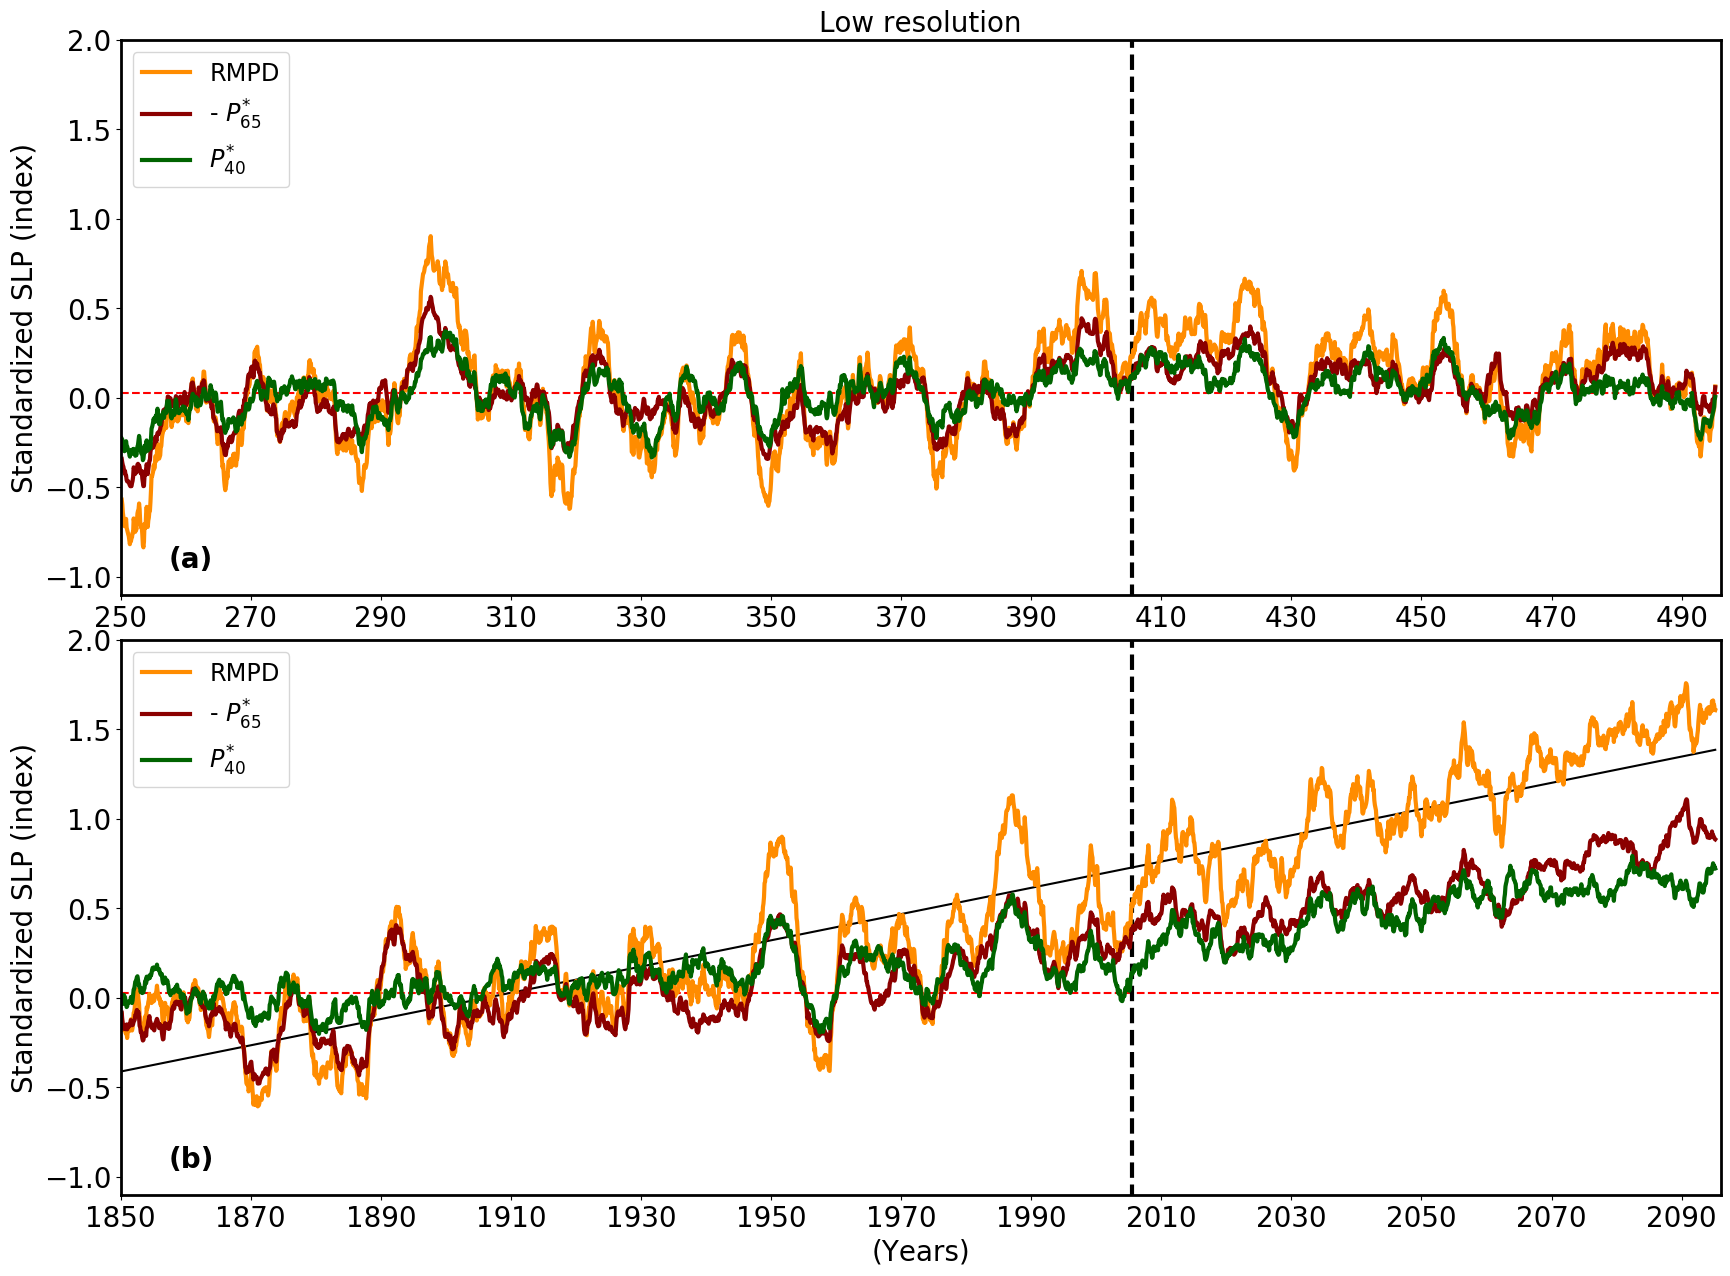

In [41]:
t = np.arange(2,2943,1)
my_font = {'fontname':'Cambria', 'size':'20'}
##################################################################
fig = plt.figure(figsize=(20,15), dpi=100)
################################################################
################################################################


ax2 = fig.add_axes([0.1, 0.9, 0.8, 0.37],
                   xticklabels=[])
ax2.plot(t,-ww2,'darkorange',linewidth=3,label='RMPD' )
ax2.plot(t,-ww65,'darkred',linewidth=3,label='- $P^{*}_{65}$' )
ax2.plot(t,ww40,'darkgreen',linewidth=3,label='$P^{*}_{40}$' )
#ax2.plot(t,ww40-ww65,'red')
plt.hlines(mean, 0, 2952, colors = "red",linestyles = "dashed")
#plt.vlines(1876, -1.25, 1, colors = "red",linestyles = "dashed")
#ax0.fill_between(t,mean,-ww2,where=-ww2 < 0,facecolor='red', alpha=1)
#########################################
plt.xticks(range(0,2952,240), ['250','270','290','310','330', '350', '370','390','410','430','450', '470', '490','510','430','450','470','490','500'],**my_font)
ax2=plt.gca();#获得坐标轴的句柄
ax2.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax2.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax2.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax2.spines['top'].set_linewidth(2);###设置右边坐标轴的粗细
#plt.yticks(**my_font)

plt.vlines(1866, -1.25, 2.5, colors = "black",linestyles = "dashed",linewidth=3)
#plt.xlabel('Years',**my_font)
#plt.xlabel('Years',**my_font)
#plt.ylabel('-P65',color= 'black',**my_font)
plt.axis("tight")
#plt.hlines(0, 0, 4200, colors = "g",linestyles = "dashed")
ax2.set(ylim=(-1.1, 2),xlim=(0, 2952))
plt.yticks(**my_font)
plt.legend(loc='upper left',fontsize='xx-large')
plt.ylabel('Standardized SLP (index)',color= 'black',**my_font)
ax2.set_title('Low resolution',**my_font)
ax2.text(0.03, 0.05, '(a)', transform=ax2.transAxes,size=20, weight='bold')
ax3 = fig.add_axes([0.1, 0.5, 0.8, 0.37],
                   xticklabels=[])
ax3.plot(t, intercept + slope*aaa, 'black')
ax3.plot(t,-RMPDplot1+0.5,'darkorange',linewidth=3,label='RMPD')
ax3.plot(t,-ww65plot+0.25,'darkred',linewidth=3,label='- $P^{*}_{65}$')
ax3.plot(t,ww40plot+0.25,'darkgreen',linewidth=3,label='$P^{*}_{40}$')
plt.hlines(mean, 0, 2952, colors = "red",linestyles = "dashed")
#plt.vlines(1876, -1.25, 1, colors = "red",linestyles = "dashed")
#ax0.fill_between(t,mean,-ww2,where=-ww2 < 0,facecolor='red', alpha=1)
#########################################
#plt.xticks(range(0,2952,240), ['1850','1870','1890','1910','1930', '1950', '1970','1990','2010','2030','2050', '2070', '2090','410','430','450','470','490','500'],**my_font)
ax3=plt.gca();#获得坐标轴的句柄
ax3.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax3.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax3.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax3.spines['top'].set_linewidth(2);###设置右边坐标轴的粗细
plt.yticks(**my_font)
#plt.xlabel('Years',**my_font)
#plt.xlabel('Years',**my_font)
#plt.ylabel('RMPD index',color= 'black',**my_font)
plt.axis("tight")
plt.vlines(1866, -1.25, 2.5, colors = "black",linestyles = "dashed",linewidth=3)
#plt.hlines(0, 0, 4200, colors = "g",linestyles = "dashed")
ax3.set(ylim=(-1.1, 2),xlim=(0, 2952))
#ax1.set_title('HF-TNST simulation (averaged over the Weddell Sea Region 45$^\circ$W - 40$^\circ$E, 5 year running mean)',**my_font)
###########################################
plt.xticks(range(0,2952,240), ['1850','1870','1890','1910','1930', '1950', '1970','1990','2010','2030','2050', '2070', '2090','410','430','450','470','490','500'],**my_font)

plt.yticks(**my_font)

plt.legend(loc='upper left',fontsize='xx-large')
ax3.text(0.03, 0.05, '(b)', transform=ax3.transAxes,size=20, weight='bold')
plt.xlabel('(Years)',color= 'black',**my_font)
plt.ylabel('Standardized SLP (index)',color= 'black',**my_font)
plt.savefig("MPDiseLR.png",bbox_inches='tight',dpi=fig.dpi)

In [45]:
np.corrcoef(-ww2,ww40)

array([[1.        , 0.93246317],
       [0.93246317, 1.        ]])

In [31]:
aaa = np.arange(0,2941,)

In [32]:
bbb = -RMPDplot1+0.5

In [33]:
bbb.shape

(2941,)

In [34]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(aaa,bbb)

In [35]:
slope

0.000610867139928045

In [36]:
intercept

-0.4108129619044245

In [37]:
 r_value

0.9042079586013986

In [38]:
p_value

0.0

In [39]:
std_err

5.322314672799388e-06

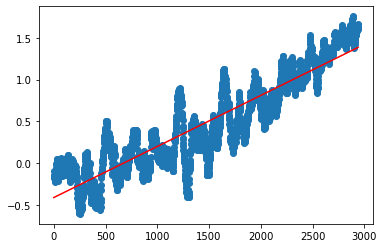

In [40]:
plt.plot(aaa, bbb, 'o', label='original data')
plt.plot(aaa, intercept + slope*aaa, 'r', label='fitted line')

In [ ]:
plotvar1 = data.variables['lon']
plotvar1[-35]
plotvar1 = data.variables['lat']
plotvar1[53]

In [43]:
slope*12

0.00733040567913654